In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [9]:
data_file_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(data_file_url)

#print(data)

In [10]:
df = pd.DataFrame()

# df['Four_D_B_Yes'] = data['Temp'].shift(6) --- including this is giving more RMSE -- Overfitting

df['Three_D_B_Yes'] = data['Temp'].shift(5)
df['Two_D_B_Yes'] = data['Temp'].shift(4)

df['D_B_Yes'] = data['Temp'].shift(3)
df['Yesterday'] = data['Temp'].shift(2)
df['Today'] = data['Temp'].shift(1)
df['Tomorrow'] = data['Temp']
df = df.dropna()

print(df.head())

   Three_D_B_Yes  Two_D_B_Yes  D_B_Yes  Yesterday  Today  Tomorrow
5           20.7         17.9     18.8       14.6   15.8      15.8
6           17.9         18.8     14.6       15.8   15.8      15.8
7           18.8         14.6     15.8       15.8   15.8      17.4
8           14.6         15.8     15.8       15.8   17.4      21.8
9           15.8         15.8     15.8       17.4   21.8      20.0


In [11]:
#X = df[['Four_D_B_Yes','Three_D_B_Yes','Two_D_B_Yes','D_B_Yes','Yesterday','Today']] ---- Overfitting
X = df[['Three_D_B_Yes','Two_D_B_Yes','D_B_Yes','Yesterday','Today']]
#X = df[['D_B_Yes','Yesterday','Today']]
#X = df[['Yesterday', 'Today']]
#X = df['Today']
y = df['Tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

'''
# Reshape X_train and X_test to be 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
'''

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2551
1094
2551
1094


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Intercept :: ", model.intercept_)
print("Coefficient (Today) :: ", model.coef_[0])
print("Coefficient (Yesterday) :: " , model.coef_[1])
print("Coefficient (D_B_Yes) :: ", model.coef_[2])
print("Coefficient (Two_D_B_Yes) :: ", model.coef_[3])
print("Coefficient (Three_D_B_Yes) :: ", model.coef_[4])

Model trained successfully!
Intercept ::  1.465936726233961
Coefficient (Today) ::  0.13107427133613397
Coefficient (Yesterday) ::  0.06365336278540046
Coefficient (D_B_Yes) ::  0.08164509001105007
Coefficient (Two_D_B_Yes) ::  -0.06756079662411978
Coefficient (Three_D_B_Yes) ::  0.6578319575178396


In [13]:
predictions = model.predict(X_test)

rmse = root_mean_squared_error(y_test, predictions)

print("The Root Mean Squared Error(RMSE) of model is :: ", rmse)

The Root Mean Squared Error(RMSE) of model is ::  2.3410902680961567


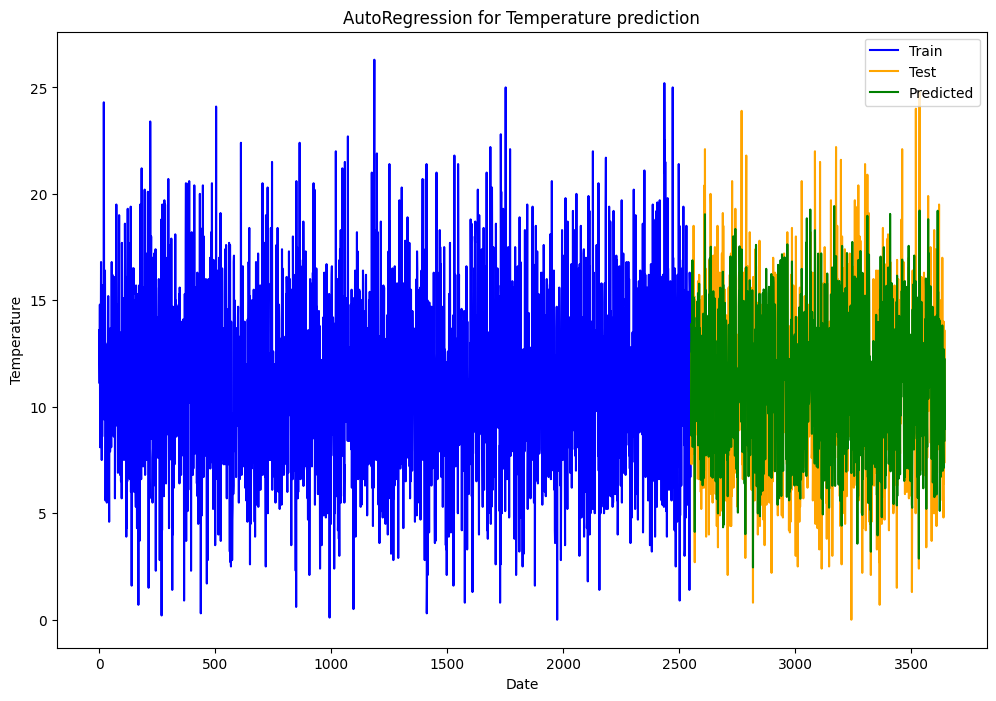

In [28]:
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 8))
plt.plot(y_train.values, label = 'Train', color = 'blue')
plt.plot(test_indices, y_test.values, label = 'Test', color = 'orange')
plt.plot(test_indices, predictions, label = 'Predicted', color = 'green')
plt.title('AutoRegression for Temperature prediction')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

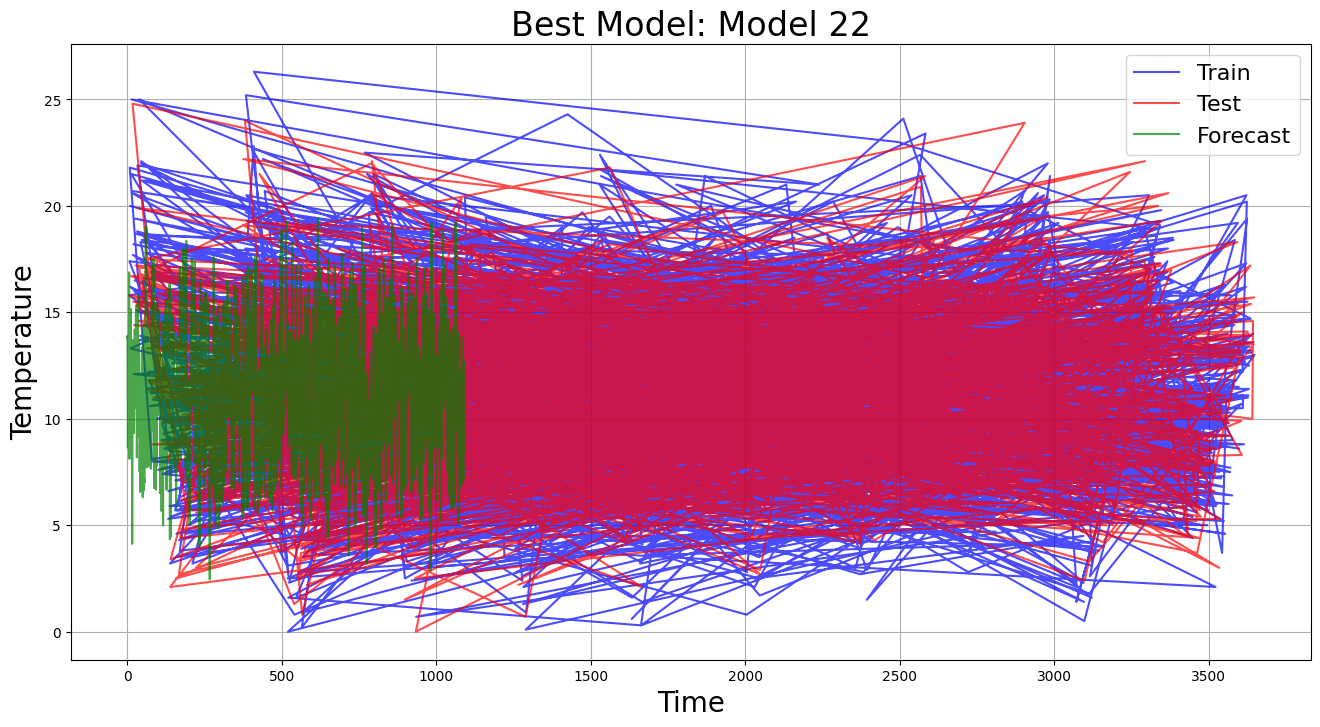

In [25]:
model_number = 22
model_name = f'model_{model_number}'


plt.figure(figsize=(16, 8))
plt.plot(y_train.index, y_train.values, label="Train", color='blue', alpha=0.7)
plt.plot(y_test.index, y_test.values, label="Test", color='red', alpha=0.7)
plt.plot(predictions, label="Forecast", color='green', alpha=0.7)

plt.title(f'Best Model: Model {model_number}', fontsize=24)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()